# Project 2

 ## Albert Kabore Titanic Data Features


#### Author: Albert Kabore

#### Date: October 30, 2025

#### Objective: Analyze and prepare the Titanic dataset for machine learning.

## Introduction: 


The sinking of the RMS Titanic in April 1912 stands as one of the most tragic and historically significant maritime disasters. More than a century later, the Titanic dataset continues to serve as a foundational tool for learning data science concepts, offering valuable insights into human behavior, societal structure, and survival dynamics during the catastrophe.

In this project, I use Python, Markdown, and modern data science libraries such as Pandas, Seaborn, and Scikit-learn to explore patterns within the Titanic passenger dataset. The analysis focuses on understanding how factors such as age, gender, passenger class, fare, and family size may have influenced survival outcomes. Through data visualization, feature engineering, and statistical exploration, this notebook aims to uncover meaningful relationships and provide an evidence-based narrative of the tragedy from a data-driven perspective.

### Project Overview


### Section 1. Import and Inspect the Data

### Import libraries

In [726]:
# All imports should be at the top of the notebook

import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

### Load the dataset

In [727]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

### Display basic information about the dataset using the info() method.



In [728]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Display the first 10 rows

In [729]:
print(titanic.head(10))


   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

### Check for missing values

In [730]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Summary statistics

In [731]:
print(titanic.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Check for correlations 

In [732]:
print(titanic.corr(numeric_only=True))


            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


## Section 2. Data Exploration and Preparation


### 2.1 Explore Data Patterns and Distributions


### Create a scatter matrix. 



array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

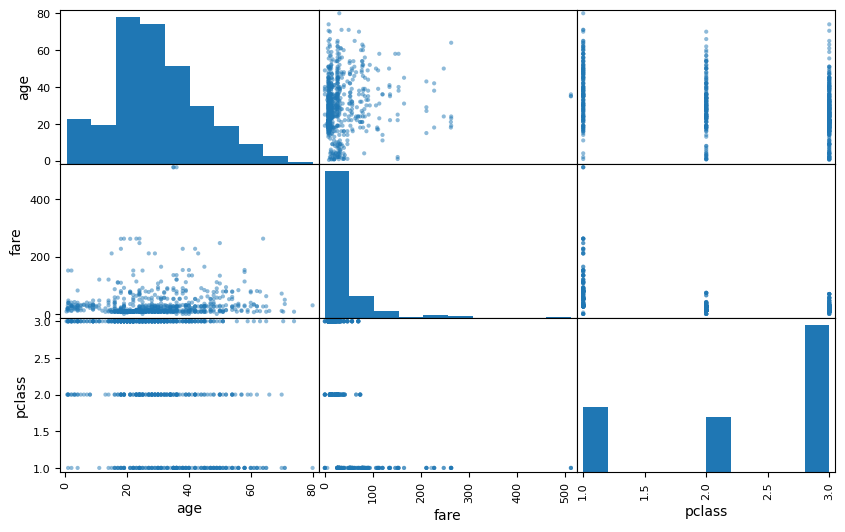

In [733]:
# all imports get moved to the top - import each only once
from pandas.plotting import scatter_matrix


attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 6))

### Create a scatter plot of age vs fare, colored by gender:

In [734]:
# all imports get moved to the top - import each only once
import matplotlib.pyplot as plt


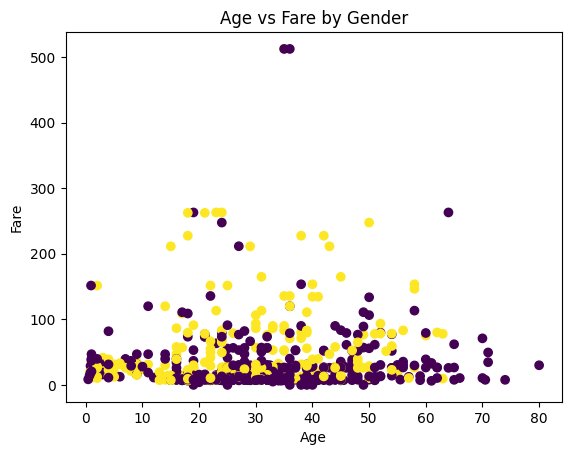

In [735]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

### plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

### Create a histogram of age:


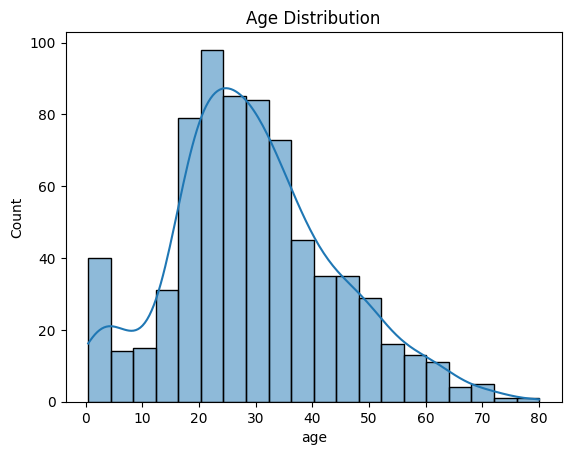

In [736]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

Create a count plot for class and survival:



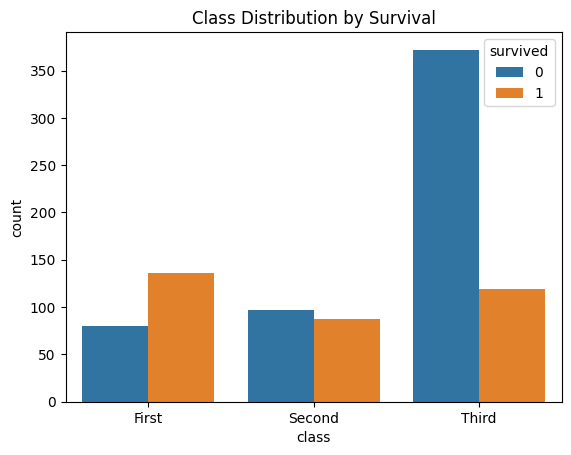

In [737]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

## Reflection 2.1:

What patterns or anomalies do you notice?

•	The fare distribution is highly skewed, with a few passengers paying extremely high fares compared to most others.

•	The age distribution is right-skewed, with more young adults and children than elderly passengers.

•	Pclass appears as a discrete variable with clear group separations.

•	A positive correlation exists between higher fares and lower passenger class numbers (1 = First Class).

Do any features stand out as potential predictors?

•	Sex: Females show a much higher survival rate than males.
•	Pclass: First-class passengers are more likely to survive compared to second and third classes.

•	Fare: Higher fares correlate with higher chances of survival, possibly reflecting socioeconomic advantage.

Are there any visible class imbalances?

•	Yes. The survived variable shows that only about 38 % of passengers survived while 62 % did not, indicating a moderate class imbalance that should be considered in model training.




## 2.2 Handle Missing Values and Clean Data



In [738]:

# Display missing counts before cleaning
print("Missing values BEFORE cleaning:")
print(titanic[["age", "embark_town", "embarked"]].isnull().sum(), "\n")

Missing values BEFORE cleaning:
age            177
embark_town      2
embarked         2
dtype: int64 



In [739]:
# Compute imputation statistics safely
age_median = titanic["age"].median(skipna=True)

# Check if embark_town has any non-missing values before taking mode
if titanic["embark_town"].dropna().empty:
    embark_town_mode = "Unknown"
else:
    embark_town_mode = titanic["embark_town"].mode(dropna=True).iloc[0]

# Same safety check for embarked
if "embarked" in titanic.columns and not titanic["embarked"].dropna().empty:
    embarked_mode = titanic["embarked"].mode(dropna=True).iloc[0]
else:
    embarked_mode = "S"   # most common port overall

print(f"Age median used: {age_median}")
print(f"Embark_town mode used: {embark_town_mode}")
print(f"Embarked mode used: {embarked_mode}\n")


Age median used: 28.0
Embark_town mode used: Southampton
Embarked mode used: S



In [740]:
# Fill the missing values
titanic["age"].fillna(age_median, inplace=True)
titanic["embark_town"].fillna(embark_town_mode, inplace=True)
titanic["embarked"].fillna(embarked_mode, inplace=True)

# Show missing counts after cleaning
print("Missing values AFTER cleaning:")
print(titanic[["age", "embark_town", "embarked"]].isnull().sum(), "\n")



Missing values AFTER cleaning:
age            0
embark_town    0
embarked       0
dtype: int64 



C:\Users\alber\AppData\Local\Temp\ipykernel_15720\1115944807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(age_median, inplace=True)
C:\Users\alber\AppData\Local\Temp\ipykernel_15720\1115944807.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [741]:
# Show summary statistics and quick verification
print("Age summary after cleaning:")
print(titanic["age"].describe(), "\n")

print("Embark_town frequency after cleaning:")
print(titanic["embark_town"].value_counts(), "\n")

print("Embarked frequency after cleaning:")
print(titanic["embarked"].value_counts(), "\n")



Age summary after cleaning:
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64 

Embark_town frequency after cleaning:
embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64 

Embarked frequency after cleaning:
embarked
S    646
C    168
Q     77
Name: count, dtype: int64 



In [742]:
# Display sample rows to verify
print("Sample rows showing cleaned values:")
print(titanic[["age", "embark_town", "embarked"]].head(10))


Sample rows showing cleaned values:
    age  embark_town embarked
0  22.0  Southampton        S
1  38.0    Cherbourg        C
2  26.0  Southampton        S
3  35.0  Southampton        S
4  35.0  Southampton        S
5  28.0   Queenstown        Q
6  54.0  Southampton        S
7   2.0  Southampton        S
8  27.0  Southampton        S
9  14.0    Cherbourg        C


### Reflection 2.3

Why might family size be a useful feature for predicting survival?

•	Passengers traveling with family members may have had a higher chance of survival because they could help each other during the evacuation.

•	Larger families might have faced challenges staying together in crowded lifeboat situations, potentially reducing survival chances.

•	The family_size variable captures both supportive and dependent relationships that can influence survival outcomes.

Why convert categorical data to numeric?

•	Machine learning models and most statistical algorithms require numeric input to perform mathematical computations.

•	Encoding categorical variables (like sex and embarked) allows models to recognize and quantify the influence of each category.

•	Numeric encoding improves model performance, enables correlation analysis, and ensures compatibility with tools such as scikit-learn.



## 3. Feature Engineering



### Create a new derived feature:


In [743]:
# --- 1. Create a new derived feature: Family Size ---
# Family size = number of siblings/spouses + number of parents/children + 1 (the passenger)
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

print(" New feature 'family_size' created successfully.\n")
print("Family Size Summary:")
print(titanic["family_size"].describe(), "\n")


 New feature 'family_size' created successfully.

Family Size Summary:
count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: family_size, dtype: float64 



C:\Users\alber\AppData\Local\Temp\ipykernel_15720\2268646380.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="family_size", data=titanic, palette="Blues")


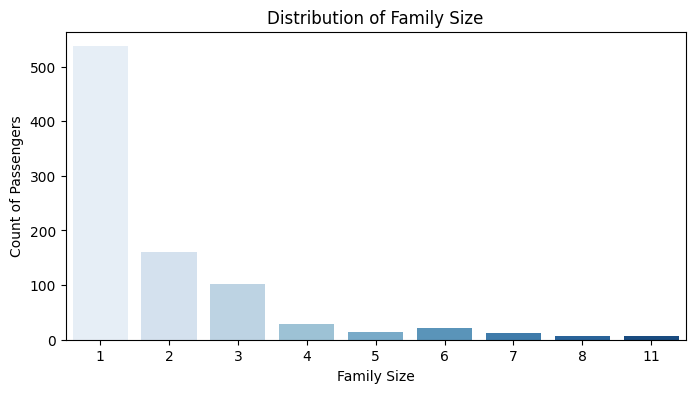

In [744]:
# Visual check: How family sizes are distributed
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x="family_size", data=titanic, palette="Blues")
plt.title("Distribution of Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count of Passengers")
plt.show()

### Convert categorical data to numeric:


In [745]:
# --- 2. Convert categorical data to numeric safely ---
# Convert 'sex' to numeric: male=0, female=1
if titanic["sex"].dtype == "O":
    titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})
print("Converted 'sex' to numeric (0=male, 1=female).")


Converted 'sex' to numeric (0=male, 1=female).


In [746]:
# Convert 'embarked' to numeric: C=0, Q=1, S=2
if titanic["embarked"].dtype == "O":
    titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})
print(" Converted 'embarked' to numeric (C=0, Q=1, S=2).\n")

 Converted 'embarked' to numeric (C=0, Q=1, S=2).



### Create a binary feature for 'alone':


In [747]:

# --- 3. Create binary indicator for 'alone' ---
# The 'alone' column already exists as boolean in seaborn’s Titanic dataset
# Convert True/False to 1/0 for modeling
if titanic["alone"].dtype == "bool":
    titanic["alone"] = titanic["alone"].astype(int)
print(" Converted 'alone' feature to binary (0=Not Alone, 1=Alone).\n")


 Converted 'alone' feature to binary (0=Not Alone, 1=Alone).



In [748]:
# --- 4. Verification of all transformations ---
print("Data Types After Transformation:")
print(titanic[["sex", "embarked", "alone", "family_size"]].dtypes, "\n")

print("Sample Data After Feature Engineering:")
print(titanic[["sex", "embarked", "alone", "sibsp", "parch", "family_size"]].head(10), "\n")

Data Types After Transformation:
sex            int64
embarked       int64
alone          int64
family_size    int64
dtype: object 

Sample Data After Feature Engineering:
   sex  embarked  alone  sibsp  parch  family_size
0    0         2      0      1      0            2
1    1         0      0      1      0            2
2    1         2      1      0      0            1
3    1         2      0      1      0            2
4    0         2      1      0      0            1
5    0         1      1      0      0            1
6    0         2      1      0      0            1
7    0         2      0      3      1            5
8    1         2      0      0      2            3
9    1         0      0      1      0            2 



In [749]:
# --- 5. Quick sanity checks ---
print("Unique values for encoded categorical variables:")
print("Sex:", titanic["sex"].unique())
print("Embarked:", titanic["embarked"].unique())
print("Alone:", titanic["alone"].unique())

Unique values for encoded categorical variables:
Sex: [0 1]
Embarked: [2 0 1]
Alone: [0 1]


## Section 3. Feature Selection and Justification


### 3.1 Choose features and target



In [750]:
target = "survived"
features = ["age", "fare", "pclass", "sex", "family_size"]

print(f"Target: {target}")
print(f"Input features: {features}\n")

print("Justification:")
print("age captures life stage which may affect evacuation")
print("fare and pclass proxy socioeconomic status and access to lifeboats")
print("sex is critical given women and children first protocol")
print("family_size captures group dynamics that may help or hinder evacuation\n")


Target: survived
Input features: ['age', 'fare', 'pclass', 'sex', 'family_size']

Justification:
age captures life stage which may affect evacuation
fare and pclass proxy socioeconomic status and access to lifeboats
sex is critical given women and children first protocol
family_size captures group dynamics that may help or hinder evacuation



In [751]:

# Safety check to ensure required columns exist
missing = [c for c in features + [target] if c not in titanic.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}")

X = titanic[features].copy()
y = titanic[target].copy()

print("Created X and y successfully")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}\n")

print("Preview of X:")
print(X.head())

print("\nDistribution of y:")
print(y.value_counts().rename("count"))
print("\nProportion of y:")
print(y.value_counts(normalize=True).rename("proportion").round(3))

Created X and y successfully
X shape: (891, 5)
y shape: (891,)

Preview of X:
    age     fare  pclass  sex  family_size
0  22.0   7.2500       3    0            2
1  38.0  71.2833       1    1            2
2  26.0   7.9250       3    1            1
3  35.0  53.1000       1    1            2
4  35.0   8.0500       3    0            1

Distribution of y:
survived
0    549
1    342
Name: count, dtype: int64

Proportion of y:
survived
0    0.616
1    0.384
Name: proportion, dtype: float64


## Reflection 3:

Why are these features selected?

•	Age: Represents life stage and physical ability — younger passengers, especially children, were more likely to receive assistance.

•	Fare: Serves as a proxy for socioeconomic status; higher fares are linked to higher-class cabins with better access to lifeboats.

•	Pclass: Reflects passenger class, which historically influenced survival priority during evacuation.

•	Sex: Critical variable, as “women and children first” was a guiding evacuation policy.

•	Family Size: Captures group dynamics — traveling with family could increase support but also create delays when staying together.

Are there any features that are likely to be highly predictive of survival?

•	Sex is likely the most predictive feature because females had significantly higher survival rates.

•	Pclass and Fare are also strong predictors due to their connection to wealth and cabin location.

•	Combining family_size with these variables can improve predictive modeling by adding social context to individual survival probabilities.







## Section 4. Splitting


### Basic Train/Test split 


In [752]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for tr_idx, te_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[tr_idx], X.iloc[te_idx]
    y_train, y_test = y.iloc[tr_idx], y.iloc[te_idx]

print("Original survived distribution")
print(y.value_counts(normalize=True).round(3))
print("Train survived distribution")
print(y_train.value_counts(normalize=True).round(3))
print("Test survived distribution")
print(y_test.value_counts(normalize=True).round(3))


Original survived distribution
survived
0    0.616
1    0.384
Name: proportion, dtype: float64
Train survived distribution
survived
0    0.617
1    0.383
Name: proportion, dtype: float64
Test survived distribution
survived
0    0.615
1    0.385
Name: proportion, dtype: float64


In [753]:
from sklearn.model_selection import train_test_split

train_set = X_train.copy()
train_set["survived"] = y_train.values

test_set = X_test.copy()
test_set["survived"] = y_test.values

print("Train size:", len(train_set))
print("Test size:",  len(test_set))


Train size: 712
Test size: 179


### Stratified Train/Test split


In [754]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results


In [755]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection 4:

Why might stratification improve model performance?

•	Stratification ensures that the proportion of target classes (survived vs. not survived) remains consistent across both training and testing datasets.

•	This prevents bias during model training, particularly when the dataset is slightly imbalanced (in this case, ~62 % non-survivors and ~38 % survivors).

•	As a result, models trained on stratified data generalize better and produce more reliable performance metrics.

How close are the training and test distributions to the original dataset?

•	The class distribution in the training set (0.617 vs. 0.383) and test set (0.615 vs. 0.385) closely matches the original distribution (0.616 vs. 0.384).

•	This indicates that stratification successfully preserved the survival ratio, maintaining data consistency between splits.

Which split method produced better class balance?

•	The StratifiedShuffleSplit method produced better class balance compared to a random train/test split.

•	It ensures both subsets reflect the original class proportions, reducing sampling bias and improving fairness in model evaluation.



